<a href="https://colab.research.google.com/github/junheeyoon/Big-Data-analyst-Study/blob/master/%EC%8B%B8%EC%9D%B4%ED%82%B7%EB%9F%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%8A%A4%EC%BC%80%EC%9D%BC_%EC%A1%B0%EC%A0%95(%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%9F%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

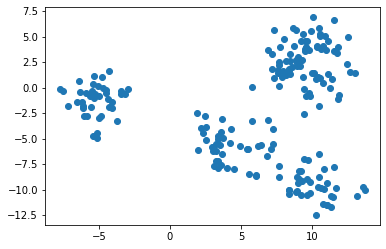

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples= 200, centers= 5, random_state=4, cluster_std=1.5)
plt.scatter(X[:,0],X[:,1])

make_blob 사항 참고

인수:

n_samples : 표본 데이터의 수, 200개

centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 5개

cluster_std: 클러스터의 표준 편차, 1.5

반환값:

X : [n_samples, n_features] 크기의 배열 독립 변수

y : [n_samples] 크기의 배열 종속 변수 (정답레이블 필요시 사용 )

In [5]:
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

<1. Standard Scaler>

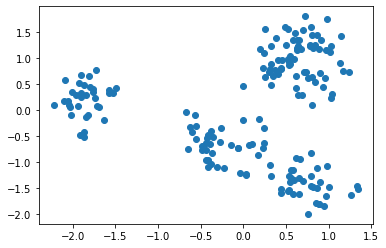

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)

# 위와 동일하지만 더 효율적입니다(fit_transform)
X_scaled_d = scaler.fit_transform(X_train)

#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

plt.scatter(X_scaled[:,0],X_scaled[:,1])

<2. Robust Scaler>

: 평균과 분산 대신 중간값(median)과 사분위값을 사용합니다

: (X - Q2) / (Q3-Q1)

[Q2 = 중간값, Q3 = 3분위값, Q1 = 1분위값]

: 이상치에 강하게 만들수 있습니다.

(1,2,3,4,5,1,3,5,1000 이런 극단저긴 데이터로 한번 생각해보세요)

<3. MinMax Scaler>

: (X-Xmin)/(Xmax-Xmin)

: 모든 값이 0~1사이에 존재

: 정규화 방법중 원데이터 분포를 유지하면서 정규화하는 방법

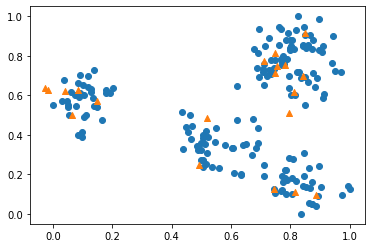

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  #train꺼로 transform한걸로 fit 중요!!!!
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 스케일이 조정된 데이터의 산점도를 그립니다
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                label="훈련 세트")
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                label="테스트 세트")

<4. Normalizer>

​: 특성벡터의 모든 길이가 1이 되도록 조정 합니다(반지름 1인 원에 투영하는 느낌)

: 특성벡터의 길이는 상관없고, 데이터의 방향이나 각도가 중요할 경우 사용합니다.